Main options

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy

In [2]:
width = 17
height = 5
matplotlib.rcParams['figure.figsize'] = [width, height]
matplotlib.rcParams['lines.markersize'] = 0.5
matplotlib.rcParams['scatter.edgecolors'] = "black"

Furier Functions

In [3]:
# Функция сглаживания
def smoth(lin, r):
    ans = copy.deepcopy(lin[r:-r])
    count = 1
    for i in range(1,r + 1):
        if (-r + i == 0):
            ans += lin[r + i:]
        else:
            ans += lin[r + i:-r + i]
        ans += lin[r - i:-r - i]
        count += 2
    print(count)
    ans = ans / count
    return ans

In [4]:
def mFFT(arr ,draw = False, x1 = 0, x2 = -1, y2 = -1, energy=False, ep = 27, radius = 0.5, norm = -1, smth = 0):
    '''
    draw - рисовать ли график
    x1, x2, y2 - границы графика
    smth - наличие сглаживания
    norm - число для нормировки, стандартное - длинна массива
    energy - искать ли энергию точки
    ep - точка для поиска энергии
    radius - радиус энергии
    '''
    if x2 == -1:
        x2 = len(arr) // 2
    if norm == -1:
        norm = len(arr)
        
    
    A = np.fft.rfft((arr - np.mean(arr)) / norm)
    
    if draw:
        
        plt.rcParams['axes.grid'] = True
        fig, ax = plt.subplots(2, figsize=(6,4), dpi=150)
        plt.tight_layout()
        
        n = np.arange(len(arr))
        n1 = len(arr) / n[1:] / 24
        
        plt.subplots_adjust(hspace = 0.5)
        
        ax[0].plot(n, arr, '.-')
        ax[0].set_title('$a[n]$') 
        
        ax[1].set_title('$A$')
        if (y2 > 0):
            ax[1].set_ylim(0, y2)
        ax[1].set_xlim(x1, x2)
        if smth > 0:
            ax[1].plot(n1[0 : (len(arr) // 2 - 2 * smth + 1)], smoth(np.abs(A), smth), '-')
        else:
            ax[1].plot(n1[0 : (len(arr) // 2 + 1)], np.abs(A), '-')
        ax[1].set_xlabel('Период (в днях)')
        
        plt.show()
    
    if (energy):
        n = np.arange(len(arr))
        n1 = len(arr) / n[1:] / 24
        
        esum = np.abs(A).sum()
        msum = np.abs(A[(np.abs(n1[0 : (len(arr) // 2 + 1)] - ep) <= radius)]).sum()
        
        print("Energy of", ep, "=", msum / esum)
    
    return np.abs(A)

In [5]:
def mFFT_en(arr, ep = 27, radius = 0.5, norm = -1):
    '''
    draw - рисовать ли график
    x1, x2, y2 - границы графика
    smth - наличие сглаживания
    norm - число для нормировки, стандартное - длинна массива
    energy - искать ли энергию точки
    ep - точка для поиска энергии
    radius - радиус энергии
    '''
    if norm == -1:
        norm = len(arr)
        
    
    A = np.fft.rfft((arr - np.mean(arr)) / norm)
    
    n = np.arange(len(arr))
    n1 = len(arr) / n[1:] / 24
        
    esum = np.abs(A).sum()
    msum = np.abs(A[(np.abs(n1[0 : (len(arr) // 2 + 1)] - ep) <= radius)]).sum()
    
    return msum / esum

RT genrator

In [6]:
n = 1000
batch_n = 10
generator = np.random.RandomState(42)

$x_t = px_{t-1} + \xi_t$


В ```noise_maker``` передается функция $\xi_t = N(\sin(wt), 0.3)$

In [7]:
def ar(p, arr, noise_maker, to_add = 10000):
    new_vals = np.array(arr)
    new_vals = np.append(new_vals, [0] * to_add)
    pos = 1
    for i in range(to_add):
        noise = noise_maker(i)
        new_vals[pos + i] = p * new_vals[pos + i - 1] + noise
    return new_vals

RT1 examples


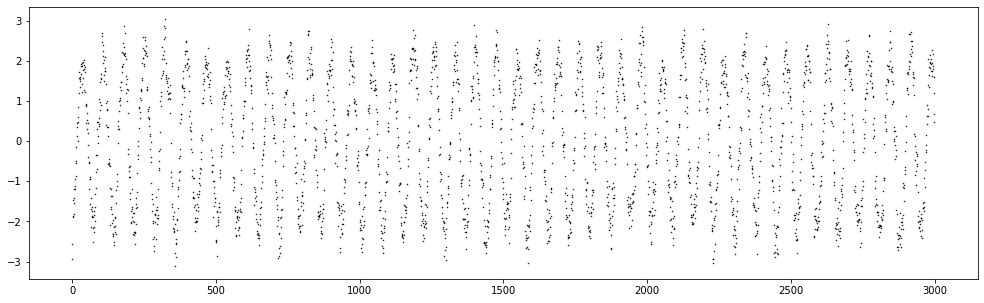

In [8]:
n_to_plot = 3000
w = 2 * np.pi/72
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

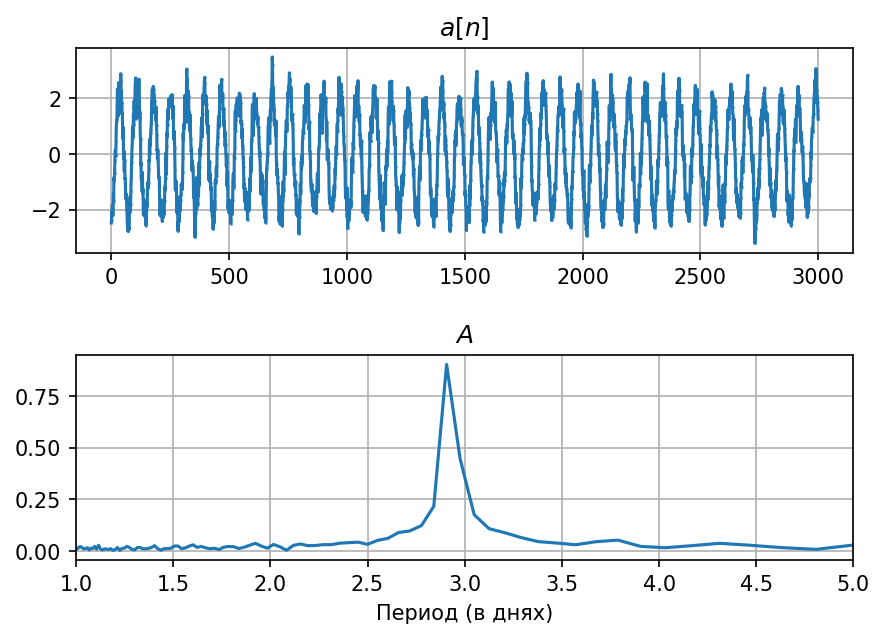

In [9]:
ans = mFFT(ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:], True, 1, 5)

$\xi_t = N(\sin(0.1t) + \sin(0.2t), 0.3)$

$p = 0.9$

$x_t = 0.9x_{t-1} + \xi_t$

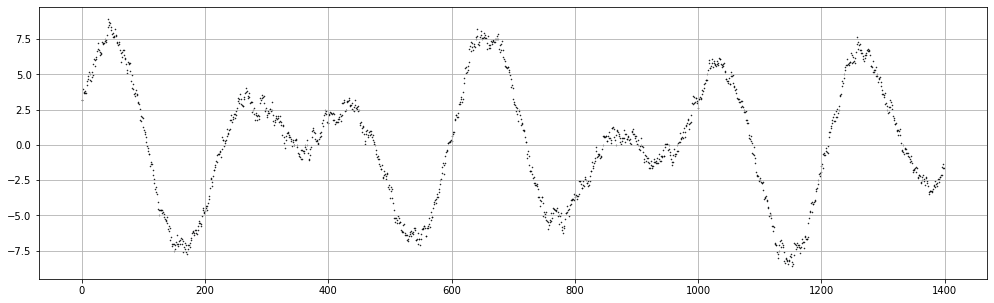

In [10]:
n_to_plot = 1400
w1 = np.pi * 2 / 200
w2 = np.pi * 2 / 317
f1 = lambda t: generator.normal(np.sin(w1 * t) + np.sin(w2 * t), 0.3)
to_plot = ar(0.75, generator.normal(100, 6), f1, 1000000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

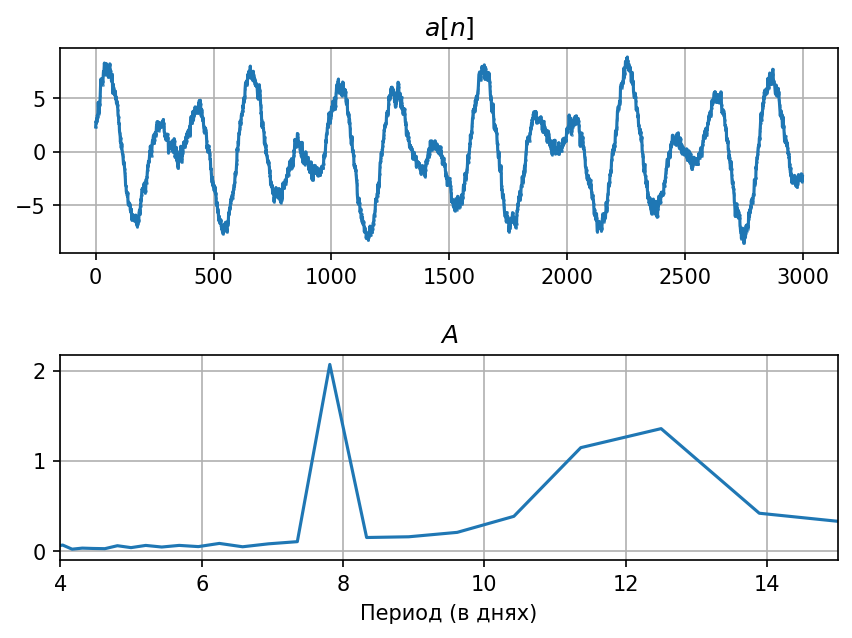

In [11]:
ans =mFFT(ar(0.75, generator.normal(100, 6), f1, 1000000)[-3000:], True, 4, 15)

Working with one RT1

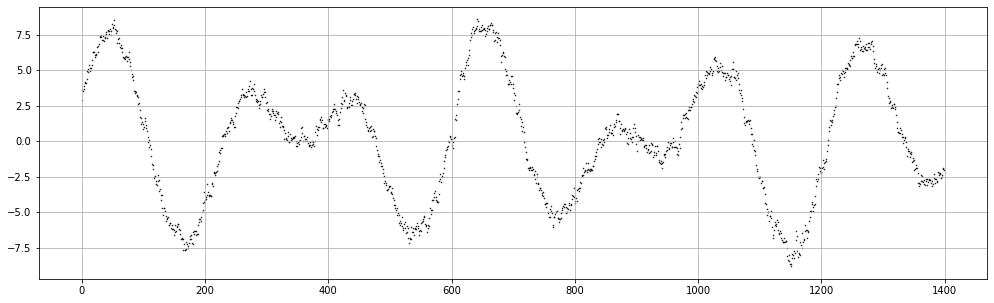

In [12]:
n_to_plot = 100000
w1 = np.pi * 2 / 200
w2 = np.pi * 2 / 317
f1 = lambda t: generator.normal(np.sin(w1 * t) + np.sin(w2 * t), 0.3)
to_plot = ar(0.75, generator.normal(100, 6), f1, 1000000)[n_to_plot:]
plt.scatter(np.arange(1400), to_plot[-1400:])

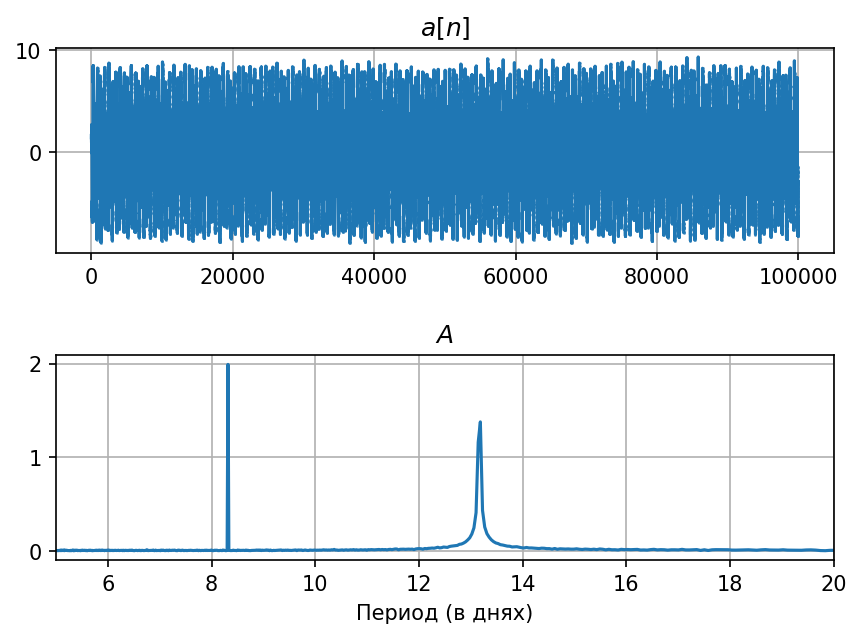

Text(0.5, 1.0, '100000h')

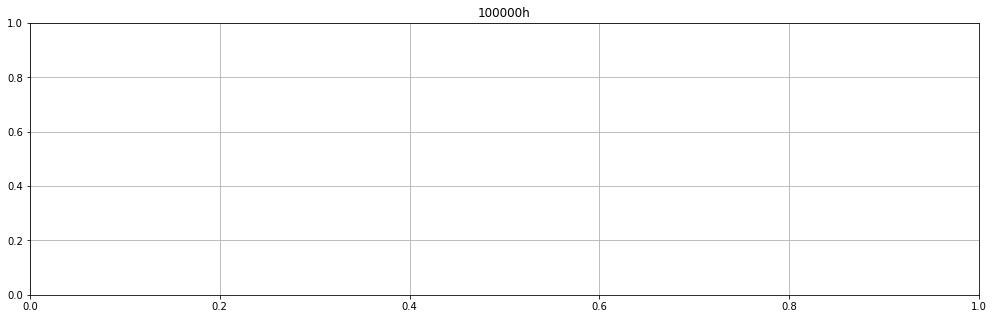

In [13]:
ans =mFFT(to_plot[:100000], True, 5, 20)
plt.title("100000h")

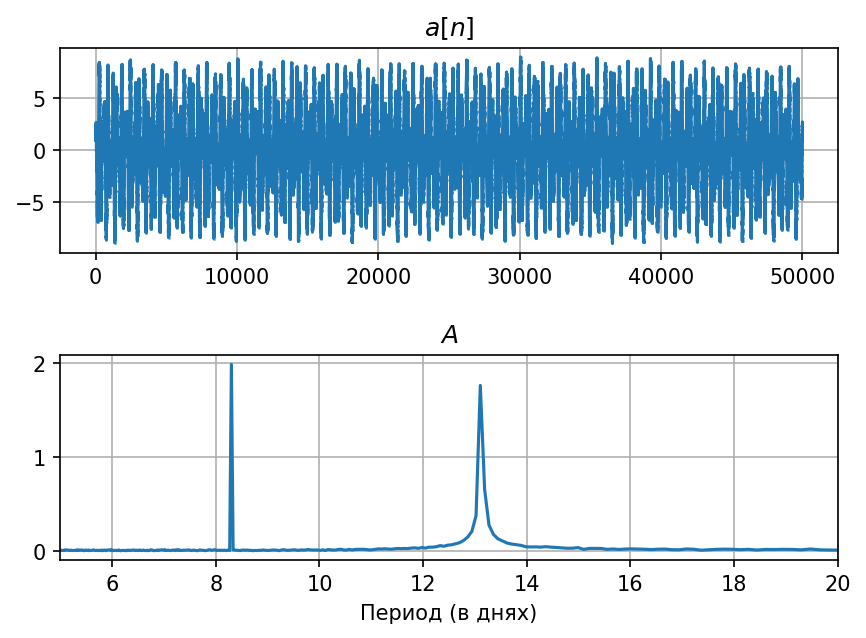

In [14]:
ans =mFFT(to_plot[:50000], True, 5, 20)

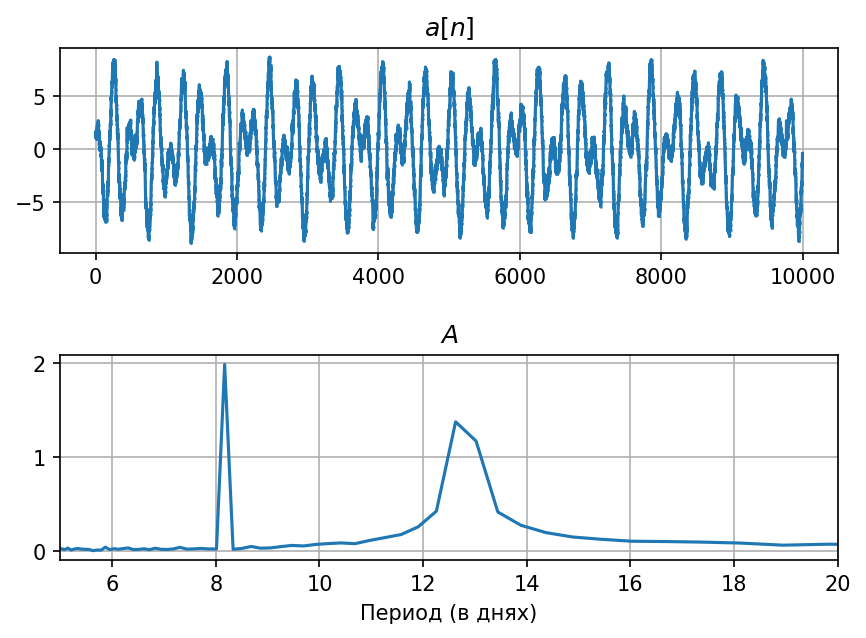

In [15]:
ans =mFFT(to_plot[:10000], True, 5, 20)

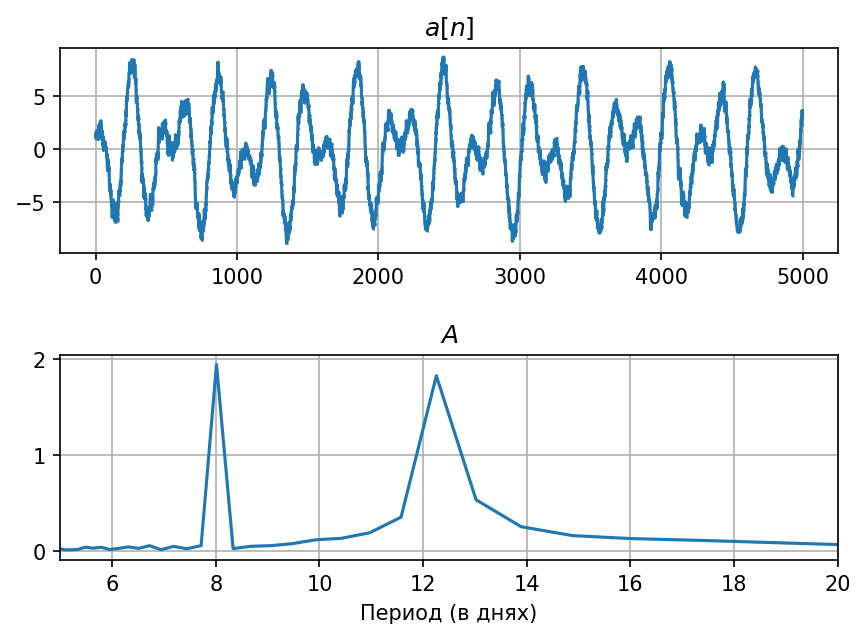

In [16]:
ans =mFFT(to_plot[:5000], True, 5, 20)

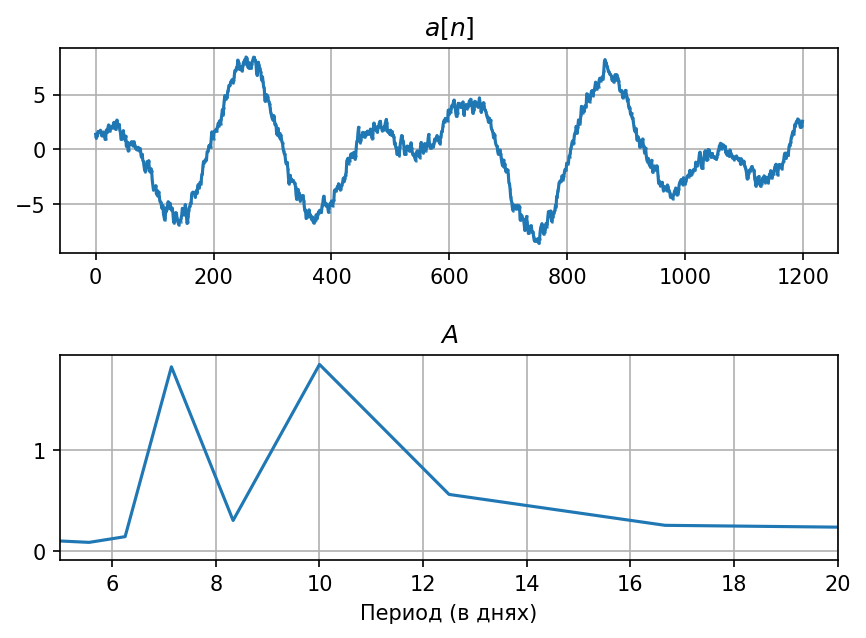

In [17]:
ans =mFFT(to_plot[:1200], True, 5, 20)

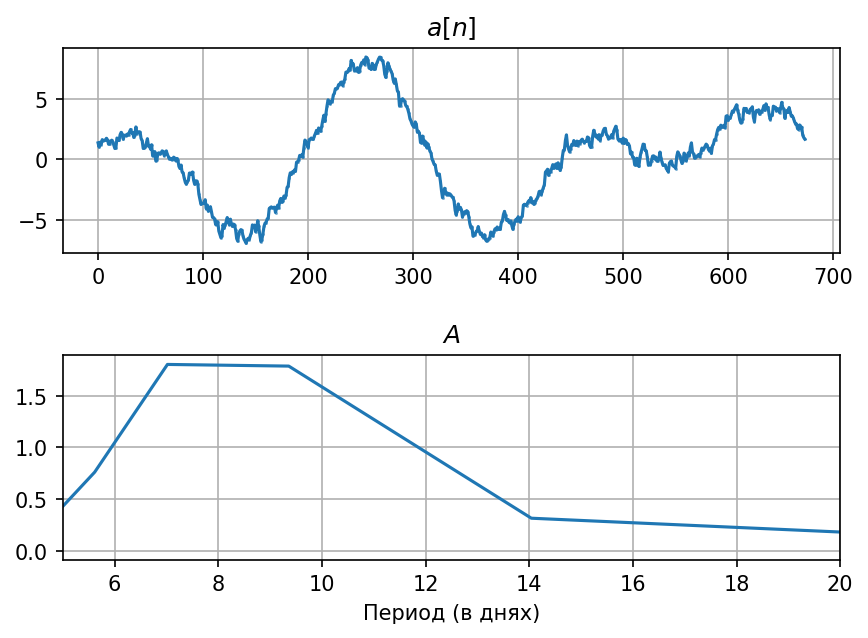

In [18]:
ans =mFFT(to_plot[:674], True, 5, 20)

## Работа с данными ##

In [19]:
import scipy.signal as scp
import pandas as pd

In [20]:
df = pd.read_table('dst.dat', sep="\s+")

In [21]:
df

,DATE,TIME,DOY,Dst
0,1958-01-01,00:00:00.000,1,-121
1,1958-01-01,01:00:00.000,1,-109
2,1958-01-01,02:00:00.000,1,-101
3,1958-01-01,03:00:00.000,1,-121
4,1958-01-01,04:00:00.000,1,-129
...,...,...,...,...
499651,2014-12-31,19:00:00.000,365,-26
499652,2014-12-31,20:00:00.000,365,-27
499653,2014-12-31,21:00:00.000,365,-27
499654,2014-12-31,22:00:00.000,365,-23


In [22]:
dst = np.array(df.values)
dst = dst[:,3]

In [23]:
def line_fft(a, sliceSize, draw = True, ln = 1):
    ans = []
    
    for i in range(0, (len(a) - sliceSize) // ln):
        ans.append(mFFT_en(a[i* ln:i * ln + sliceSize]))
    Ans = np.array(ans)
    if (draw):
        fig, ax = plt.subplots(1, figsize=(6,4), dpi=150)
        n = np.arange(len(Ans))
        ax.plot(n, Ans, '.-')
        ax.set_title('amplitudes')
    return Ans

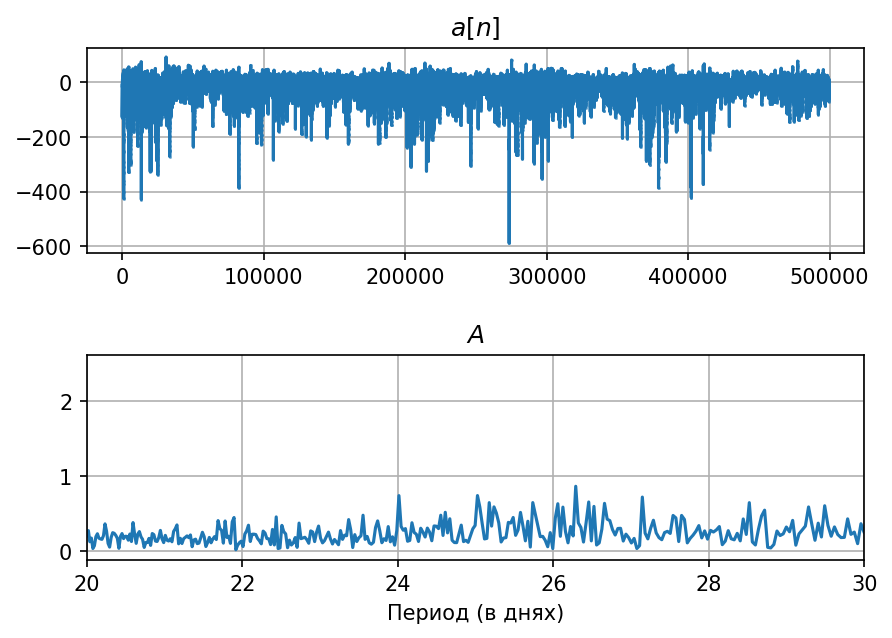

Energy of 27 = 0.00247468013166508


array([9.73179870e-16, 2.11748095e+00, 5.56476393e-01, ...,
       3.07712193e-03, 1.08845206e-03, 1.37694734e-03])

In [24]:
mFFT(dst, draw = True, x1 = 20,x2 = 30, energy=True)

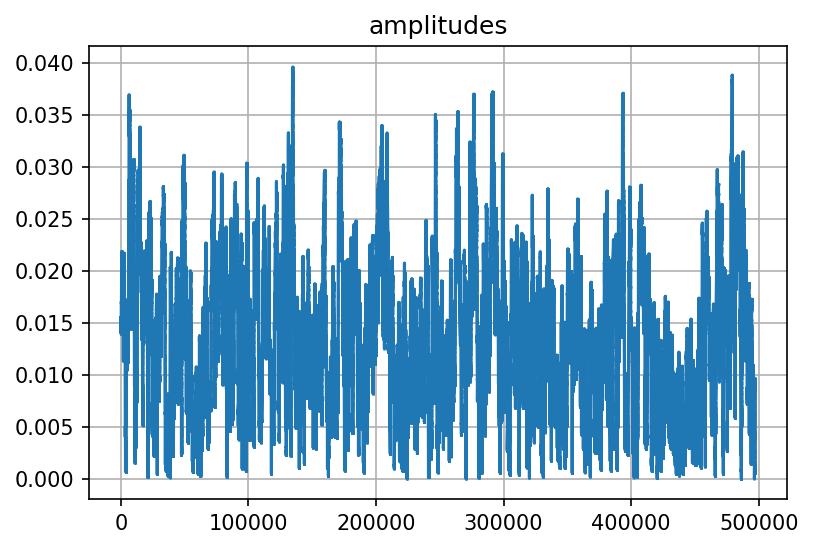

In [25]:
ar = line_fft(dst, 27 * 4 * 24)


In [26]:
ar = smoth(ar, 12)

25


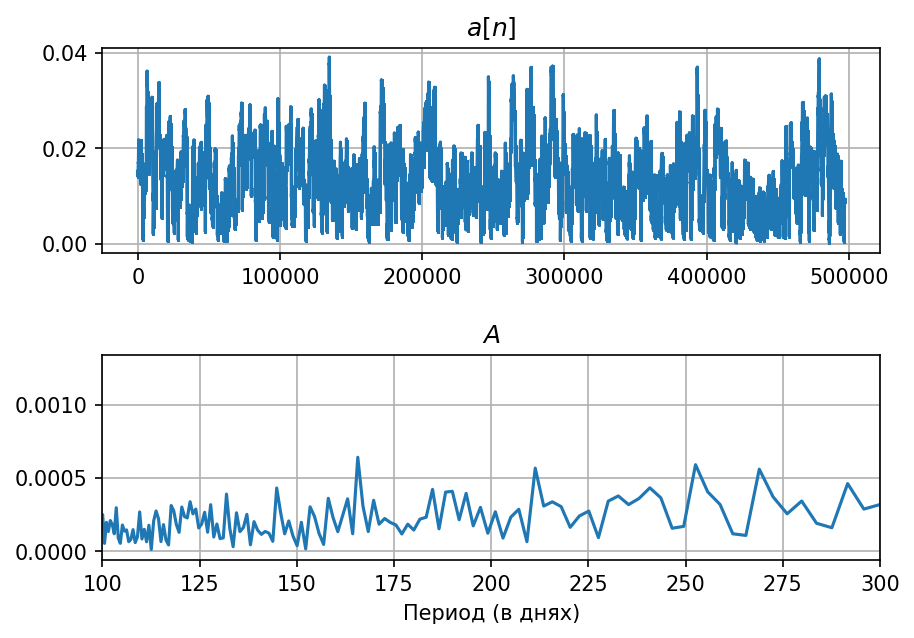

array([6.81125663e-18, 6.13244915e-04, 4.71635901e-04, ...,
       5.65415721e-09, 6.09468207e-09, 6.24348611e-09])

In [27]:
mFFT(ar, draw = True, x1 = 100, x2 = 300)

## Фильтрация ##

In [28]:
df = pd.read_table('dst.dat', sep="\s+") 
df.DATE = pd.to_datetime(df.DATE,  format='%Y-%m-%d')
#1958-01-01 - 2014-12-31

In [29]:
smoth(np.array(df.Dst), 1)

3


array([-110.33333333, -110.33333333, -117.        , ...,  -26.66666667,
        -25.66666667,  -24.33333333])

# 27 days ~ 648 hours

21
3


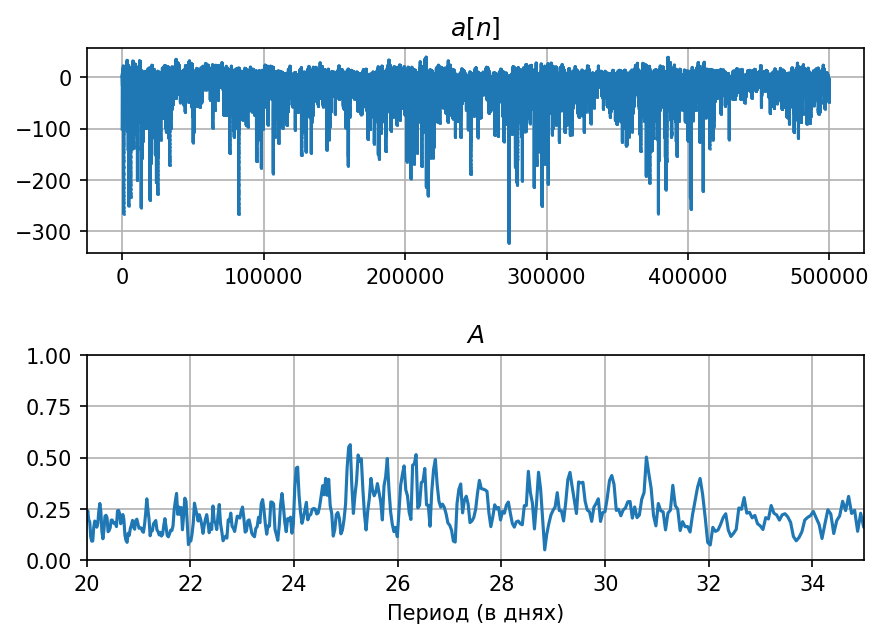

Energy of 27 = 0.005275070442735887


array([3.90638043e-16, 2.11950699e+00, 5.54404839e-01, ...,
       9.51098159e-05, 4.19633119e-05, 1.46392288e-04])

In [30]:
mFFT(smoth(np.array(df.Dst), 10), energy = True, draw = True, x1 = 20, x2 = 35, ep = 27, radius = 0.5, y2 = 1, smth = 1)

In [31]:
import datetime

In [32]:
def recalc(item, m1 = 3, m2 = 9):
    return (np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year, m1, 20)).days) < 30) or (np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year, m2, 23)).days) < 30)
df["flag"] = df.apply(recalc, axis= 1)
dst_red = df.Dst.mean() * np.logical_not(df.flag) + df.flag * df.Dst
nrm = df.flag.sum()

3


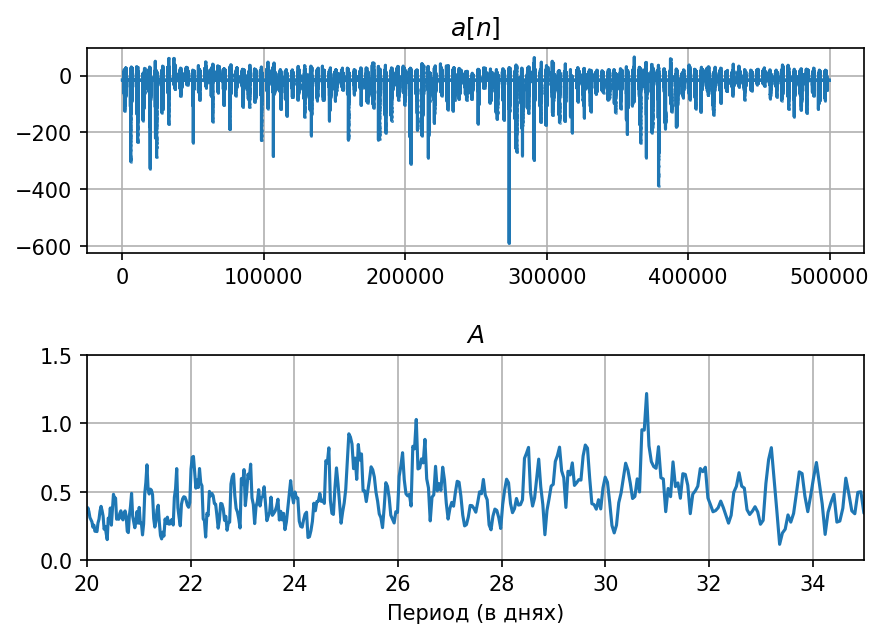

Energy of 27 = 0.002247107793712172


array([2.93653990e-14, 2.99913199e+00, 7.09429544e-01, ...,
       4.60764667e-03, 5.13036750e-03, 8.07191000e-03])

In [33]:
mFFT(dst_red, energy = True, draw = True, x1 = 20, x2 = 35, y2 = 1.5, ep = 27, radius = 0.5, norm = nrm, smth = 1)

In [34]:
def recalcc(item, m1 = 6, m2 = 12):
    return (np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year, m1, 20)).days) < 30) or (np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year, m2, 23)).days) < 30)


In [35]:
df["flag"] = df.apply(recalcc, axis= 1)
dst_red2 = df.Dst.mean() * (1 - df.flag) + df.flag * df.Dst

3


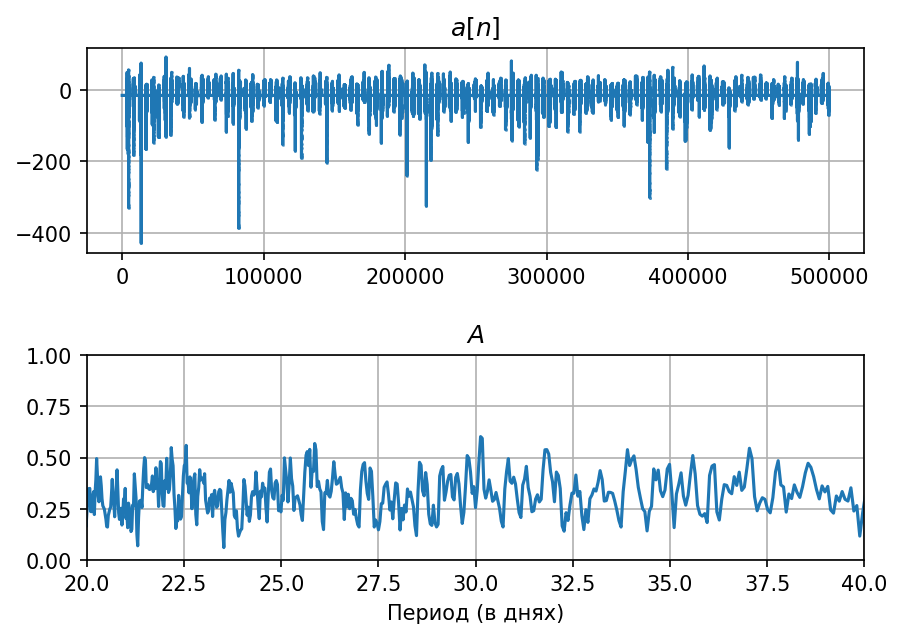

Energy of 27 = 0.0018479853221303692


array([4.95480393e-14, 6.82411034e-01, 8.09524065e-01, ...,
       5.32713563e-03, 3.30019746e-03, 6.91347012e-03])

In [36]:
mFFT(dst_red2, energy = True, draw = True, x1 = 20, x2 = 40, ep = 27, radius = 0.5, y2 = 1, norm = nrm, smth = 1)

In [48]:
def calc_near(item, month, day, rad): 
    return (np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year, month, day)).days) < rad) or \
(np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year + 1, month, day)).days) < rad) or \
(np.abs((item["DATE"].date() - datetime.date(item["DATE"].date().year - 1, month, day)).days) < rad)
    

In [51]:
def full_calc(item, month, day, rad):
    fil = item.apply(calc_near, axis= 1, month = month, day = day, rad = rad)
    ans = item.Dst.mean() * (1 - fil) + fil * item.Dst
    return ans, fil

In [52]:
full_calc(df, 3, 20, 30)

(0        -15.281854
 1        -15.281854
 2        -15.281854
 3        -15.281854
 4        -15.281854
             ...    
 499651   -15.281854
 499652   -15.281854
 499653   -15.281854
 499654   -15.281854
 499655   -15.281854
 Length: 499656, dtype: float64, 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 499651    False
 499652    False
 499653    False
 499654    False
 499655    False
 Length: 499656, dtype: bool)

In [53]:
df

,DATE,TIME,DOY,Dst,flag
0,1958-01-01,00:00:00.000,1,-121,False
1,1958-01-01,01:00:00.000,1,-109,False
2,1958-01-01,02:00:00.000,1,-101,False
3,1958-01-01,03:00:00.000,1,-121,False
4,1958-01-01,04:00:00.000,1,-129,False
...,...,...,...,...,...
499651,2014-12-31,19:00:00.000,365,-26,True
499652,2014-12-31,20:00:00.000,365,-27,True
499653,2014-12-31,21:00:00.000,365,-27,True
499654,2014-12-31,22:00:00.000,365,-23,True
